<a href="https://colab.research.google.com/github/PaulCashman73/feral-cat-census/blob/main/notebooks/yolo/train_yolo_instance_segmentation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook trains a YOLO v8 segmentation model with data downloaded from the Roboflow project feral-cat-segmentation.

In [4]:
# Create the Colab folder into which to unzip the training/test data set
!mkdir /content/data

The Roboflow dataset includes a data.yaml file which points to the training, test, and validation datasets.  Before uploading to Colab, the data.yaml file must be edited so these file pointers are relevant to the Colab file structure.  Then the data.yaml file and the image files can be zipped and uploaded to Colab.

In [2]:
!unzip -d /content/data  /content/feral-cat-segmentation.v5i.yolov11.zip

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/feral-cat-segmentation.v5i.yolov12/valid/labels/IMG_4045_JPG.rf.628db8e2f99e1fe80f611eb1d3dfb2bb.txt  
  inflating: /content/data/__MACOSX/feral-cat-segmentation.v5i.yolov12/valid/labels/._IMG_4045_JPG.rf.628db8e2f99e1fe80f611eb1d3dfb2bb.txt  
  inflating: /content/data/feral-cat-segmentation.v5i.yolov12/valid/labels/group0795_jpeg.rf.4b612f79ec6ead2aa63faf4867aeadd5.txt  
  inflating: /content/data/__MACOSX/feral-cat-segmentation.v5i.yolov12/valid/labels/._group0795_jpeg.rf.4b612f79ec6ead2aa63faf4867aeadd5.txt  
  inflating: /content/data/feral-cat-segmentation.v5i.yolov12/valid/labels/group0765_jpg.rf.7c6078d9ded571d29ec880864d7efc4b.txt  
  inflating: /content/data/__MACOSX/feral-cat-segmentation.v5i.yolov12/valid/labels/._group0765_jpg.rf.7c6078d9ded571d29ec880864d7efc4b.txt  
  inflating: /content/data/feral-cat-segmentation.v5i.yolov12/valid/labels/group0865_jpeg.rf.d7b3ce57ecae853f07f92f071b9e2f4c.txt 

In [3]:
# Verify that the data.yaml file points to /content/data/training/... and similar pointers for the test and validation image sets
!cat /content/data/data.yaml

train: /content/data/train/images
val: /content/data/valid/images
test: /content/data/test/images

nc: 1
names: ['cat']

roboflow:
  workspace: paul-cashman-mxgwb
  project: feral-cat-segmentation
  version: 5
  license: Public Domain
  url: https://universe.roboflow.com/paul-cashman-mxgwb/feral-cat-segmentation/dataset/5

In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [6]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
# Load a pre-trained YOLOv11 segmentation model.  See https://docs.ultralytics.com/tasks/segment/#models for details.
model = YOLO("yolo11m-seg.pt")

100%|██████████| 43.3M/43.3M [00:00<00:00, 98.4MB/s]


In [7]:
project = '/content/data/results'
name = '200-epochs'
results = model.train(data='/content/data/data.yaml', epochs=200, project=project, name=name, patience=0, batch=4, imgsz=640)

Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolo11m-seg.pt, data=/content/data/data.yaml, epochs=200, time=None, patience=0, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/data/results, name=200-epochs, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 755k/755k [00:00<00:00, 20.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 104MB/s]


AMP: checks passed ✅


train: Scanning /content/data/train/labels... 1152 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1152/1152 [00:03<00:00, 347.71it/s]

train: WARNING ⚠️ /content/data/train/images/group0017_jpeg.rf.bdcf7e5ac0ff18d6daa4eb82fa976063.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/data/train/images/group0235_jpeg.rf.04e051ee8c743bb8fa98dadcc02ab16e.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/data/train/images/group0235_jpeg.rf.1dbcd91be1191d0ccebefb733a48dfb3.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/data/train/images/group0235_jpeg.rf.3f1a9f9121cb81b02239a1cb51ba65a9.jpg: 1 duplicate labels removed
train: New cache created: /content/data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/data/valid/labels... 110 images, 0 backgrounds, 0 corrupt: 100%|██████████| 110/110 [00:00<00:00, 259.94it/s]

val: New cache created: /content/data/valid/labels.cache


Plotting labels to /content/data/results/200-epochs/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/data/results/200-epochs
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/200      3.15G      1.573      3.184      1.898      1.612         45        640: 100%|██████████| 288/288 [01:17<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.95it/s]

                   all        110        708      0.451      0.431      0.374      0.174      0.449      0.427      0.357      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/200      3.72G      1.868      3.619      2.084      1.844         44        640: 100%|██████████| 288/288 [01:12<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.85it/s]

                   all        110        708      0.414      0.338      0.315      0.137      0.424      0.325      0.306      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/200      3.79G      1.865      3.642      2.116       1.83         12        640: 100%|██████████| 288/288 [01:11<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.95it/s]

                   all        110        708       0.39      0.448      0.382      0.185      0.412      0.441      0.362      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/200      3.87G      1.788      3.503      2.017      1.786         45        640: 100%|██████████| 288/288 [01:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.12it/s]

                   all        110        708      0.527      0.463       0.47      0.233      0.527      0.428      0.437      0.215



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/200      3.94G      1.698      3.378      1.928      1.715         29        640: 100%|██████████| 288/288 [01:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.35it/s]

                   all        110        708      0.567      0.475      0.506      0.273      0.599      0.476      0.495      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/200      4.01G      1.675      3.305      1.894        1.7         27        640: 100%|██████████| 288/288 [01:12<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.35it/s]

                   all        110        708      0.579      0.513      0.524      0.283      0.564      0.489      0.492      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/200      4.08G      1.616      3.201      1.821      1.647         24        640: 100%|██████████| 288/288 [01:11<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.34it/s]


                   all        110        708      0.645      0.551      0.603      0.345      0.645       0.54       0.59      0.334

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/200      4.16G      1.594      3.131      1.758      1.632         17        640: 100%|██████████| 288/288 [01:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.32it/s]


                   all        110        708      0.596      0.551      0.587      0.348      0.633      0.506      0.573      0.329

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/200      4.23G       1.54      3.056      1.678      1.596         29        640: 100%|██████████| 288/288 [01:11<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.37it/s]

                   all        110        708       0.68      0.571      0.623      0.388      0.671      0.562      0.613      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/200      4.34G      1.513      3.026      1.659      1.572         34        640: 100%|██████████| 288/288 [01:12<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.37it/s]

                   all        110        708        0.7      0.607      0.651      0.401      0.695      0.603       0.64      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/200       4.5G      1.494      2.944       1.61      1.566         30        640: 100%|██████████| 288/288 [01:11<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.38it/s]

                   all        110        708      0.702      0.589      0.659      0.401      0.698      0.581      0.638      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/200      4.57G      1.495       2.95      1.622      1.563         49        640: 100%|██████████| 288/288 [01:11<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.07it/s]

                   all        110        708      0.686      0.605      0.655      0.417      0.672      0.592      0.637      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/200      4.74G      1.475      2.911      1.597      1.554         39        640: 100%|██████████| 288/288 [01:12<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.32it/s]

                   all        110        708       0.72      0.599      0.668      0.423      0.726      0.597      0.668      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/200      4.81G      1.465      2.849      1.525      1.537         24        640: 100%|██████████| 288/288 [01:11<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.80it/s]

                   all        110        708      0.692      0.641      0.672      0.439      0.695      0.645      0.667      0.421



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/200       5.1G      1.428      2.783      1.499      1.527         53        640: 100%|██████████| 288/288 [01:11<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.32it/s]

                   all        110        708      0.752      0.602      0.702      0.461      0.738      0.602      0.692      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/200      5.18G      1.433      2.774      1.457      1.508         46        640: 100%|██████████| 288/288 [01:11<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.49it/s]

                   all        110        708      0.717      0.632      0.698      0.447      0.721      0.597      0.663      0.402



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/200      5.25G      1.412      2.746      1.456      1.498         30        640: 100%|██████████| 288/288 [01:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.33it/s]

                   all        110        708      0.733      0.664       0.71      0.445      0.735      0.647      0.691      0.415



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/200      5.32G       1.42      2.784      1.505      1.504         56        640: 100%|██████████| 288/288 [01:12<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.36it/s]

                   all        110        708       0.75       0.61      0.698      0.458      0.758      0.607      0.695      0.419



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/200      5.43G      1.386      2.699      1.427      1.488          5        640: 100%|██████████| 288/288 [01:11<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.36it/s]

                   all        110        708      0.724      0.661      0.732      0.482      0.777       0.61      0.712      0.446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/200      5.62G      1.411      2.736      1.424      1.497         29        640: 100%|██████████| 288/288 [01:09<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.89it/s]

                   all        110        708      0.683      0.641       0.68      0.446      0.682      0.625      0.674      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/200       5.7G      1.382      2.642      1.395      1.475         39        640: 100%|██████████| 288/288 [01:11<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.89it/s]

                   all        110        708      0.784      0.673      0.759      0.508      0.796      0.657      0.744       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/200      5.86G      1.348      2.639      1.371      1.458         43        640: 100%|██████████| 288/288 [01:11<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.87it/s]

                   all        110        708      0.809      0.644       0.76      0.496      0.814      0.629      0.745      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/200         6G       1.34      2.584      1.341      1.453         23        640: 100%|██████████| 288/288 [01:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.44it/s]

                   all        110        708      0.738       0.62      0.701      0.459      0.727      0.634      0.695      0.442



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/200      6.14G      1.324      2.597      1.335      1.432         39        640: 100%|██████████| 288/288 [01:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.52it/s]

                   all        110        708      0.793       0.65      0.749      0.512      0.799      0.645      0.735      0.475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/200      6.27G      1.309      2.526      1.294      1.413         42        640: 100%|██████████| 288/288 [01:10<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.66it/s]

                   all        110        708      0.726      0.674       0.73      0.487      0.734      0.665      0.713      0.443



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/200      6.34G      1.304      2.528      1.274       1.42         23        640: 100%|██████████| 288/288 [01:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.50it/s]

                   all        110        708      0.763      0.685      0.761       0.52      0.741      0.689      0.744      0.486



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/200      6.52G      1.297      2.532      1.262      1.411         52        640: 100%|██████████| 288/288 [01:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.43it/s]

                   all        110        708      0.784      0.646      0.744      0.505        0.8      0.655      0.752      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/200      6.64G      1.294      2.526      1.295      1.409         39        640: 100%|██████████| 288/288 [01:10<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.50it/s]

                   all        110        708       0.76      0.671      0.757      0.519      0.766      0.682      0.755      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/200      6.71G      1.306      2.515      1.287      1.419         25        640: 100%|██████████| 288/288 [01:09<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.65it/s]

                   all        110        708      0.767      0.704      0.769      0.529      0.784      0.681      0.762       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/200      6.89G      1.254      2.436      1.211      1.384         28        640: 100%|██████████| 288/288 [01:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.52it/s]

                   all        110        708      0.791       0.65      0.751      0.515      0.817      0.653      0.749      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/200      6.96G      1.297      2.459      1.221       1.39         41        640: 100%|██████████| 288/288 [01:11<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.50it/s]

                   all        110        708      0.772      0.679      0.777      0.531      0.843      0.633      0.767       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/200       7.2G      1.273       2.46       1.22      1.391         44        640: 100%|██████████| 288/288 [01:10<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.58it/s]

                   all        110        708      0.833      0.695      0.797      0.549      0.842      0.693      0.792      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/200      7.27G      1.246      2.438      1.193      1.375         21        640: 100%|██████████| 288/288 [01:11<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.53it/s]

                   all        110        708       0.77      0.672      0.775      0.531       0.74      0.682      0.756      0.504



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/200      7.35G      1.255      2.419      1.195      1.375         59        640: 100%|██████████| 288/288 [01:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.56it/s]

                   all        110        708      0.808      0.727      0.801      0.559      0.794      0.703      0.788      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/200      7.54G      1.236      2.383      1.168      1.357         28        640: 100%|██████████| 288/288 [01:11<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.49it/s]

                   all        110        708      0.812      0.716      0.807      0.558      0.845      0.696      0.798      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/200      7.61G      1.236      2.379       1.15      1.356         41        640: 100%|██████████| 288/288 [01:11<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.46it/s]

                   all        110        708      0.781      0.737      0.796      0.551      0.783      0.737      0.794      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/200      7.84G      1.228       2.38      1.145      1.357         34        640: 100%|██████████| 288/288 [01:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.49it/s]

                   all        110        708      0.778      0.727      0.788      0.536      0.787      0.727      0.792      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/200      7.91G      1.218      2.317      1.152      1.348         33        640: 100%|██████████| 288/288 [01:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.56it/s]

                   all        110        708      0.825      0.713       0.82      0.574      0.839      0.708      0.815      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/200      7.98G      1.226      2.381      1.136      1.362         56        640: 100%|██████████| 288/288 [01:11<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.58it/s]

                   all        110        708      0.851      0.692      0.796      0.561      0.856      0.687      0.798      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/200      8.15G      1.201      2.313      1.093      1.333         63        640: 100%|██████████| 288/288 [01:13<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.67it/s]

                   all        110        708      0.841      0.716      0.818      0.577      0.869      0.719      0.812      0.545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/200      8.25G      1.179      2.245      1.101      1.332         23        640: 100%|██████████| 288/288 [01:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.62it/s]

                   all        110        708      0.812      0.732      0.814      0.579      0.813      0.742      0.814      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/200      8.44G      1.197      2.254      1.082      1.326         47        640: 100%|██████████| 288/288 [01:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.55it/s]

                   all        110        708      0.821      0.729      0.809       0.56      0.812      0.732      0.808      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/200      8.56G      1.186       2.27      1.074      1.328         38        640: 100%|██████████| 288/288 [01:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.04it/s]

                   all        110        708      0.828      0.722      0.819      0.574      0.828      0.722      0.815      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/200      8.63G       1.17      2.262      1.058      1.311         24        640: 100%|██████████| 288/288 [01:11<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.58it/s]

                   all        110        708      0.848      0.708       0.82      0.579      0.859      0.715      0.821      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/200      8.76G       1.18      2.227      1.064      1.316         35        640: 100%|██████████| 288/288 [01:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.25it/s]


                   all        110        708      0.831      0.729      0.818      0.585      0.832      0.728      0.809      0.546

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/200      8.96G      1.185      2.277      1.059      1.324         45        640: 100%|██████████| 288/288 [01:11<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.51it/s]

                   all        110        708      0.812      0.712        0.8      0.562      0.819      0.717      0.802      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/200      9.25G      1.192      2.291      1.055       1.33         39        640: 100%|██████████| 288/288 [01:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.62it/s]

                   all        110        708      0.833      0.746      0.825        0.6      0.858      0.736      0.833      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/200      9.32G      1.151      2.188       1.02      1.292         57        640: 100%|██████████| 288/288 [01:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.31it/s]


                   all        110        708      0.771      0.727      0.793      0.573      0.792      0.716      0.798      0.553

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/200      9.39G      1.159      2.207       1.03        1.3         57        640: 100%|██████████| 288/288 [01:11<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.48it/s]

                   all        110        708      0.806       0.71      0.796      0.565      0.841      0.692      0.786      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/200      9.47G      1.171      2.226       1.06       1.31         46        640: 100%|██████████| 288/288 [01:11<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.53it/s]

                   all        110        708      0.863      0.713       0.82      0.582       0.87      0.715      0.816      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/200      9.61G      1.134      2.152     0.9822      1.287         28        640: 100%|██████████| 288/288 [01:11<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.56it/s]

                   all        110        708      0.863      0.702      0.824      0.588      0.867      0.705      0.826      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/200      9.68G      1.131      2.177     0.9917      1.278         39        640: 100%|██████████| 288/288 [01:10<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.62it/s]

                   all        110        708      0.815      0.724      0.813      0.587      0.819      0.727      0.808      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/200      9.82G      1.141      2.184     0.9965      1.292         28        640: 100%|██████████| 288/288 [01:10<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.60it/s]

                   all        110        708      0.853      0.732       0.84        0.6      0.857      0.732      0.838      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/200      9.98G      1.114      2.134      0.973      1.268         33        640: 100%|██████████| 288/288 [01:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.14it/s]

                   all        110        708      0.826      0.715      0.817       0.59      0.881      0.684      0.814      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/200      10.1G      1.129      2.174     0.9768       1.28         36        640: 100%|██████████| 288/288 [01:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.62it/s]

                   all        110        708      0.813      0.717      0.813      0.575      0.816      0.718      0.806       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/200      10.2G      1.126      2.167     0.9889      1.275         22        640: 100%|██████████| 288/288 [01:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.47it/s]

                   all        110        708      0.795      0.758      0.823      0.592      0.806      0.756      0.825      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/200      10.4G      1.109      2.142     0.9682      1.271         27        640: 100%|██████████| 288/288 [01:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.57it/s]

                   all        110        708       0.84      0.716      0.819      0.577      0.851      0.721      0.819      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/200      10.5G      1.122      2.139     0.9531       1.27         39        640: 100%|██████████| 288/288 [01:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.64it/s]

                   all        110        708      0.833      0.716      0.822        0.6      0.839      0.719      0.822      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/200      10.7G      1.114      2.125     0.9523      1.264         40        640: 100%|██████████| 288/288 [01:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.55it/s]

                   all        110        708      0.831      0.737      0.831      0.595      0.832       0.74      0.829      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/200      10.7G      1.126      2.168     0.9671      1.269         46        640: 100%|██████████| 288/288 [01:10<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.21it/s]


                   all        110        708      0.829      0.752      0.837      0.617      0.832      0.755      0.834      0.577

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/200      10.8G      1.102      2.106     0.9298      1.261         46        640: 100%|██████████| 288/288 [01:11<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.65it/s]

                   all        110        708      0.858      0.733       0.83      0.594      0.869      0.722      0.825      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/200        11G      1.104       2.09     0.8943      1.247         47        640: 100%|██████████| 288/288 [01:11<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.63it/s]

                   all        110        708      0.813      0.726      0.807      0.585      0.861      0.692      0.806       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/200      11.1G      1.107      2.097     0.9306      1.254         33        640: 100%|██████████| 288/288 [01:11<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.49it/s]

                   all        110        708      0.836      0.722      0.835      0.594      0.844      0.729      0.832      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/200      11.2G      1.095      2.062     0.9424      1.248         31        640: 100%|██████████| 288/288 [01:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.61it/s]

                   all        110        708      0.823      0.766      0.838      0.607       0.83       0.77      0.841      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/200      11.4G      1.087      2.068      0.919      1.246         20        640: 100%|██████████| 288/288 [01:11<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.66it/s]

                   all        110        708      0.839      0.743      0.829      0.589      0.839      0.743      0.829      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/200      11.5G      1.086      2.075     0.9122      1.247         15        640: 100%|██████████| 288/288 [01:09<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.05it/s]


                   all        110        708      0.855      0.737      0.828      0.611      0.859      0.731      0.829      0.583

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/200      11.7G      1.097      2.097     0.9291       1.25         33        640: 100%|██████████| 288/288 [01:10<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.34it/s]

                   all        110        708      0.831      0.713      0.801      0.589      0.829      0.706      0.798      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/200      11.8G      1.066      2.041     0.8812      1.228         51        640: 100%|██████████| 288/288 [01:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.91it/s]

                   all        110        708      0.821      0.742      0.833      0.605      0.845      0.739      0.836      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/200        12G      1.059      2.028      0.885      1.229         28        640: 100%|██████████| 288/288 [01:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.61it/s]

                   all        110        708      0.848      0.758      0.848      0.634      0.845      0.768      0.848      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/200      12.1G       1.06      2.041     0.8901      1.236         14        640: 100%|██████████| 288/288 [01:10<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.66it/s]

                   all        110        708      0.832       0.75      0.819      0.599      0.853      0.753      0.841      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/200      12.2G      1.062      2.038     0.8768      1.238         38        640: 100%|██████████| 288/288 [01:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.54it/s]

                   all        110        708      0.837      0.739       0.83       0.61      0.854      0.743      0.829      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/200      12.3G      1.057      2.025     0.8653      1.221         17        640: 100%|██████████| 288/288 [01:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.38it/s]

                   all        110        708       0.87      0.767      0.854      0.633      0.875      0.761       0.85      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/200      12.4G      1.026      1.958     0.8264      1.201         36        640: 100%|██████████| 288/288 [01:10<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.09it/s]


                   all        110        708      0.864      0.762      0.856      0.621      0.875      0.759      0.854      0.587

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/200      12.6G      1.037      1.988     0.8544      1.207         49        640: 100%|██████████| 288/288 [01:10<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.58it/s]

                   all        110        708      0.828      0.782      0.848      0.634      0.849      0.768       0.85      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/200      12.7G      1.073      2.006     0.8712      1.224         25        640: 100%|██████████| 288/288 [01:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.27it/s]

                   all        110        708      0.861      0.752      0.848       0.63      0.864      0.754      0.847      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/200      12.9G      1.051      2.011     0.8573      1.221         41        640: 100%|██████████| 288/288 [01:10<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.67it/s]

                   all        110        708      0.862      0.741      0.842      0.612      0.852      0.766      0.846      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/200        13G      1.042      2.008      0.849      1.209         35        640: 100%|██████████| 288/288 [01:10<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.18it/s]


                   all        110        708       0.87      0.728      0.841      0.635      0.876       0.73      0.845      0.593

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/200      13.1G      1.049      1.973     0.8434      1.213         32        640: 100%|██████████| 288/288 [01:11<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.42it/s]

                   all        110        708      0.857      0.758      0.852      0.634       0.85      0.767      0.843        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/200      13.2G      1.005      1.906     0.7889      1.181         50        640: 100%|██████████| 288/288 [01:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.86it/s]

                   all        110        708      0.835      0.757      0.839      0.623      0.842       0.76      0.839        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/200      13.3G      1.014      1.944     0.8224      1.187         31        640: 100%|██████████| 288/288 [01:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.61it/s]

                   all        110        708      0.819      0.757       0.84      0.621      0.843      0.757      0.844      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/200      4.17G      1.016      1.936     0.8196      1.188         33        640: 100%|██████████| 288/288 [01:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.61it/s]

                   all        110        708      0.808      0.766       0.84      0.623      0.819      0.756      0.839      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/200      4.17G      1.014      1.928     0.8035      1.194         27        640: 100%|██████████| 288/288 [01:10<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.17it/s]

                   all        110        708      0.846      0.739      0.836      0.626       0.86      0.737      0.837      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/200      4.23G      1.004      1.918     0.7918       1.19         63        640: 100%|██████████| 288/288 [01:11<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.68it/s]

                   all        110        708      0.841       0.76       0.85      0.639      0.855      0.766      0.854      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/200      4.23G      1.016      1.915     0.8133      1.194         16        640: 100%|██████████| 288/288 [01:10<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.56it/s]

                   all        110        708      0.855       0.77      0.851      0.632      0.864      0.764      0.856      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/200      4.45G      1.004      1.915     0.7898      1.185         46        640: 100%|██████████| 288/288 [01:10<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.90it/s]

                   all        110        708      0.851      0.791      0.866      0.646      0.861      0.778      0.858      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/200      4.45G     0.9934      1.891     0.7802      1.182         31        640: 100%|██████████| 288/288 [01:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.54it/s]

                   all        110        708      0.812      0.771      0.838      0.623      0.841      0.749      0.839      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/200      4.45G      1.018      1.945     0.8001      1.183         28        640: 100%|██████████| 288/288 [01:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.52it/s]

                   all        110        708      0.851      0.735      0.841      0.626       0.86      0.737      0.838      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/200       4.5G     0.9904      1.875     0.7629      1.175         22        640: 100%|██████████| 288/288 [01:15<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.54it/s]

                   all        110        708      0.851      0.764      0.854      0.637      0.855      0.772      0.854      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/200       4.5G          1      1.891     0.7727      1.179         19        640: 100%|██████████| 288/288 [01:15<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.50it/s]

                   all        110        708      0.862      0.753      0.843      0.638      0.865       0.76       0.85      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/200      4.58G     0.9855      1.893     0.7725      1.171         53        640: 100%|██████████| 288/288 [01:14<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.47it/s]

                   all        110        708      0.843       0.78      0.851       0.63      0.881      0.741      0.849      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/200      4.58G     0.9972      1.889     0.7776      1.171         26        640: 100%|██████████| 288/288 [01:13<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.43it/s]

                   all        110        708      0.857      0.756      0.839      0.632      0.867      0.756      0.841      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/200      4.65G     0.9863      1.911     0.7723      1.177         32        640: 100%|██████████| 288/288 [01:14<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.47it/s]

                   all        110        708      0.872      0.736      0.836      0.633      0.872      0.747      0.841      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/200      4.71G     0.9977      1.887     0.7576      1.171         74        640: 100%|██████████| 288/288 [01:14<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.43it/s]

                   all        110        708      0.856      0.742      0.837      0.628       0.86      0.746       0.84      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/200      4.81G     0.9835      1.866     0.7647      1.169         46        640: 100%|██████████| 288/288 [01:13<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.51it/s]

                   all        110        708      0.861       0.77      0.866      0.637       0.87      0.771      0.858      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/200      4.89G     0.9833      1.877     0.7779      1.168         63        640: 100%|██████████| 288/288 [01:13<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.93it/s]

                   all        110        708      0.832      0.779      0.859      0.641      0.835      0.774      0.854      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/200      4.89G     0.9821      1.887     0.7699      1.167         89        640: 100%|██████████| 288/288 [01:14<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.56it/s]

                   all        110        708      0.845      0.768      0.846      0.637       0.85      0.767      0.851      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/200      4.95G     0.9618      1.839      0.736      1.152         21        640: 100%|██████████| 288/288 [01:12<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.64it/s]

                   all        110        708      0.815      0.771      0.844      0.627      0.825      0.781      0.848      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/200      5.07G     0.9646      1.822     0.7361      1.162         25        640: 100%|██████████| 288/288 [01:13<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.58it/s]

                   all        110        708      0.835      0.759      0.845      0.633       0.84      0.763       0.85      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/200      5.19G     0.9633      1.827     0.7364      1.151         24        640: 100%|██████████| 288/288 [01:12<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.73it/s]

                   all        110        708       0.89      0.744      0.859      0.644      0.894      0.747      0.863      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/200      5.33G     0.9634      1.832     0.7161      1.147         27        640: 100%|██████████| 288/288 [01:13<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.59it/s]

                   all        110        708      0.847      0.798      0.862      0.651       0.85      0.801      0.864       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/200      5.45G     0.9598      1.821     0.7294      1.148         21        640: 100%|██████████| 288/288 [01:13<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.26it/s]

                   all        110        708      0.857      0.784      0.857       0.64      0.857      0.784      0.856      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/200      5.61G     0.9562       1.82     0.7017      1.143         48        640: 100%|██████████| 288/288 [01:13<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.49it/s]

                   all        110        708      0.879      0.746      0.854      0.641      0.881      0.746      0.852       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/200      5.72G     0.9569      1.823     0.7359      1.139         21        640: 100%|██████████| 288/288 [01:13<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.57it/s]

                   all        110        708      0.859      0.776      0.857       0.64      0.879      0.759      0.858      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/200      5.86G     0.9501      1.825     0.7102      1.144         38        640: 100%|██████████| 288/288 [01:12<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.67it/s]

                   all        110        708       0.87      0.768      0.852      0.632      0.875      0.761      0.848      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/200      5.94G     0.9555      1.805     0.7036      1.137         71        640: 100%|██████████| 288/288 [01:13<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.53it/s]

                   all        110        708      0.857      0.779      0.866      0.657      0.898      0.753       0.87       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/200      6.21G     0.9375      1.805     0.7029      1.134         36        640: 100%|██████████| 288/288 [01:13<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.51it/s]

                   all        110        708      0.853      0.778      0.868      0.664      0.858      0.769      0.866      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/200      6.29G     0.9436      1.809     0.7291      1.141         18        640: 100%|██████████| 288/288 [01:14<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.47it/s]

                   all        110        708      0.869      0.758      0.859      0.648      0.872      0.759      0.857      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/200       6.4G     0.9586      1.797     0.7156      1.145         43        640: 100%|██████████| 288/288 [01:13<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.86it/s]

                   all        110        708      0.849      0.753      0.847      0.642      0.849      0.753       0.84      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/200      6.58G     0.9196      1.749     0.6798      1.121         53        640: 100%|██████████| 288/288 [01:12<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.56it/s]

                   all        110        708      0.863      0.754      0.859      0.635      0.863       0.76       0.86       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/200      6.66G     0.9283      1.766      0.695      1.129         56        640: 100%|██████████| 288/288 [01:13<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.56it/s]

                   all        110        708      0.826      0.825      0.862      0.647      0.895      0.758      0.868      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/200      6.78G     0.9248      1.733     0.6697      1.122         84        640: 100%|██████████| 288/288 [01:13<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.73it/s]

                   all        110        708      0.843      0.798      0.858      0.639      0.851      0.801      0.862      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/200      6.85G     0.9271      1.767     0.6925      1.132         67        640: 100%|██████████| 288/288 [01:13<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.02it/s]


                   all        110        708      0.871      0.782      0.862      0.642      0.875      0.775      0.863       0.62

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/200      7.04G     0.9244      1.764     0.6841      1.128         46        640: 100%|██████████| 288/288 [01:13<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.11it/s]

                   all        110        708      0.849      0.795      0.866      0.645       0.86      0.789      0.865      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/200      7.12G     0.9108      1.731     0.6583      1.118         86        640: 100%|██████████| 288/288 [01:14<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.49it/s]

                   all        110        708      0.884      0.741      0.856      0.643      0.861      0.771      0.858      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/200      7.23G     0.9106       1.73     0.6679      1.115         56        640: 100%|██████████| 288/288 [01:13<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.62it/s]

                   all        110        708      0.883      0.764      0.865      0.655      0.883      0.781      0.871      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/200      7.46G     0.9088      1.732     0.6565      1.114         60        640: 100%|██████████| 288/288 [01:14<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.54it/s]

                   all        110        708      0.883      0.777      0.858      0.657      0.887      0.775      0.858      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/200      7.53G     0.9058      1.711     0.6631      1.119         56        640: 100%|██████████| 288/288 [01:14<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.48it/s]

                   all        110        708      0.852      0.775      0.859      0.651      0.875      0.771      0.865      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/200      7.61G     0.9079      1.718     0.6712       1.11         43        640: 100%|██████████| 288/288 [01:14<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.47it/s]

                   all        110        708      0.874      0.753      0.856      0.651      0.883      0.756      0.853      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/200      7.78G     0.9083      1.739       0.66      1.108         46        640: 100%|██████████| 288/288 [01:13<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.50it/s]

                   all        110        708      0.809        0.8      0.849      0.653      0.815      0.812       0.86      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/200      7.94G      0.898      1.704     0.6449      1.112         37        640: 100%|██████████| 288/288 [01:14<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.58it/s]

                   all        110        708      0.879      0.777      0.866      0.668      0.887      0.776      0.866      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/200      8.06G     0.9326      1.761     0.6654      1.121         64        640: 100%|██████████| 288/288 [01:14<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.52it/s]

                   all        110        708      0.895       0.76      0.864      0.653      0.892      0.764      0.867      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/200      8.19G     0.8953      1.732     0.6542      1.102         84        640: 100%|██████████| 288/288 [01:14<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.48it/s]

                   all        110        708      0.866      0.781      0.866      0.662      0.865       0.78      0.868      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/200      8.26G     0.9066      1.736     0.6505      1.105         35        640: 100%|██████████| 288/288 [01:12<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.88it/s]

                   all        110        708      0.852      0.787      0.864      0.665      0.851      0.788      0.871       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/200      8.45G     0.8857      1.711     0.6381      1.112         43        640: 100%|██████████| 288/288 [01:13<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.74it/s]

                   all        110        708      0.843      0.799      0.861      0.654      0.846      0.801      0.865      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/200      8.52G     0.9022      1.723     0.6608      1.107         47        640: 100%|██████████| 288/288 [01:14<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.01it/s]

                   all        110        708      0.848      0.805      0.869      0.659      0.863      0.805      0.875      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/200      8.63G     0.8765      1.683      0.628      1.098         50        640: 100%|██████████| 288/288 [01:14<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.54it/s]

                   all        110        708      0.872      0.768      0.856      0.651      0.881      0.773      0.865      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/200      8.83G      0.884      1.695     0.6247      1.101         51        640: 100%|██████████| 288/288 [01:14<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.53it/s]

                   all        110        708      0.851      0.773      0.854      0.652      0.865       0.77      0.859      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/200      8.96G     0.8764      1.674      0.628      1.091         45        640: 100%|██████████| 288/288 [01:14<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.41it/s]

                   all        110        708      0.883      0.807      0.873      0.672       0.88      0.812      0.875      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/200      9.13G      0.881      1.677     0.6164      1.094         58        640: 100%|██████████| 288/288 [01:15<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.68it/s]

                   all        110        708      0.859       0.79      0.861      0.659      0.864      0.794      0.859       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/200       9.2G     0.8826      1.693     0.6261        1.1         29        640: 100%|██████████| 288/288 [01:13<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.82it/s]

                   all        110        708      0.853      0.778      0.852      0.665       0.86      0.782      0.847      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/200       9.4G     0.8886      1.674     0.6222      1.092         32        640: 100%|██████████| 288/288 [01:14<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.43it/s]

                   all        110        708      0.875      0.808      0.874      0.678      0.879      0.804      0.874      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/200      9.47G     0.8769      1.682     0.6252       1.09         33        640: 100%|██████████| 288/288 [01:14<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.54it/s]

                   all        110        708      0.866      0.805       0.87      0.665      0.849      0.806      0.868      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/200      9.54G     0.8779      1.695     0.6285      1.088         45        640: 100%|██████████| 288/288 [01:14<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.45it/s]

                   all        110        708      0.847      0.799      0.865      0.668      0.851      0.805       0.87      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/200      9.79G     0.8557      1.649     0.6191      1.088         34        640: 100%|██████████| 288/288 [01:14<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.51it/s]

                   all        110        708      0.852      0.766      0.855       0.66      0.869      0.763       0.85      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/200      9.86G     0.8542      1.628     0.5967      1.079         46        640: 100%|██████████| 288/288 [01:14<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.03it/s]

                   all        110        708       0.86      0.787      0.863       0.66      0.869      0.794      0.861      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/200      9.93G     0.8446      1.608     0.5924      1.081         31        640: 100%|██████████| 288/288 [01:13<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.55it/s]

                   all        110        708      0.822      0.817      0.863      0.663      0.879      0.781      0.866      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/200        10G     0.8567      1.645      0.613       1.08         48        640: 100%|██████████| 288/288 [01:14<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.48it/s]

                   all        110        708      0.883       0.77      0.862      0.669      0.885      0.777      0.866      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/200      10.3G     0.8451      1.615     0.5925      1.073         26        640: 100%|██████████| 288/288 [01:13<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.56it/s]

                   all        110        708      0.794      0.825      0.855      0.671      0.856      0.777      0.862      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/200      10.4G     0.8627      1.645     0.6056      1.081         42        640: 100%|██████████| 288/288 [01:14<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.49it/s]

                   all        110        708        0.9      0.768      0.867      0.672      0.896       0.77      0.862       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/200      10.6G     0.8762      1.656     0.6089      1.088         30        640: 100%|██████████| 288/288 [01:14<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.12it/s]

                   all        110        708      0.892      0.749      0.859      0.665      0.891      0.771      0.865      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/200      10.7G     0.8634      1.638     0.5878      1.078         36        640: 100%|██████████| 288/288 [01:14<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.45it/s]

                   all        110        708      0.859      0.774      0.867      0.678      0.862      0.783      0.868      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/200      10.8G     0.8359       1.63     0.6004      1.069         25        640: 100%|██████████| 288/288 [01:14<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.47it/s]

                   all        110        708       0.85      0.801      0.865      0.679      0.859      0.809      0.872       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/200      10.9G     0.8224      1.592     0.5766      1.064         23        640: 100%|██████████| 288/288 [01:13<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.50it/s]

                   all        110        708      0.864      0.773      0.859      0.672       0.86      0.792      0.871      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/200        11G     0.8258      1.552     0.5706      1.063         32        640: 100%|██████████| 288/288 [01:14<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.56it/s]

                   all        110        708      0.847      0.802      0.868      0.682      0.855      0.809      0.874      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/200      11.2G     0.8305      1.589     0.5661      1.061         23        640: 100%|██████████| 288/288 [01:13<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.53it/s]

                   all        110        708      0.876      0.817      0.878      0.684      0.879      0.813      0.881      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/200      11.4G     0.8313      1.596     0.5759      1.068         38        640: 100%|██████████| 288/288 [01:13<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.74it/s]


                   all        110        708      0.866      0.778      0.863      0.679      0.874      0.784      0.864      0.644

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/200      11.4G     0.8273      1.582     0.5714      1.064         57        640: 100%|██████████| 288/288 [01:13<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.20it/s]

                   all        110        708      0.877      0.806      0.876      0.695      0.881      0.796      0.877      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/200      11.6G     0.8365      1.597      0.573       1.07         47        640: 100%|██████████| 288/288 [01:13<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.52it/s]

                   all        110        708      0.862      0.777      0.858      0.676       0.87      0.787      0.864      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/200      11.6G     0.8259      1.574     0.5646      1.061         63        640: 100%|██████████| 288/288 [01:14<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.52it/s]

                   all        110        708      0.879      0.772       0.86      0.678      0.882      0.788      0.867      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/200      11.8G     0.8413      1.587     0.5741       1.06         42        640: 100%|██████████| 288/288 [01:13<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.49it/s]

                   all        110        708      0.871      0.789      0.866      0.685      0.877      0.795      0.873      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/200        12G     0.8254      1.581     0.5734      1.059         29        640: 100%|██████████| 288/288 [01:14<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.84it/s]

                   all        110        708      0.841      0.829       0.87      0.682      0.835      0.821      0.871      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/200        12G       0.82      1.571     0.5716      1.055         24        640: 100%|██████████| 288/288 [01:14<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.56it/s]

                   all        110        708      0.872       0.79       0.87       0.69      0.882      0.795      0.873      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/200      12.2G     0.8013      1.545     0.5483       1.05         38        640: 100%|██████████| 288/288 [01:14<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.54it/s]

                   all        110        708      0.872      0.792      0.865      0.682      0.878      0.798      0.874      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/200      12.3G     0.8289      1.585     0.5623      1.052         37        640: 100%|██████████| 288/288 [01:13<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.25it/s]

                   all        110        708      0.874      0.771       0.86      0.675      0.883      0.775      0.867      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/200      12.4G     0.8083      1.561     0.5407      1.053         36        640: 100%|██████████| 288/288 [01:14<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.55it/s]

                   all        110        708       0.86      0.799      0.869      0.682      0.865      0.804      0.876      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/200      12.5G     0.8201      1.583     0.5492      1.051         42        640: 100%|██████████| 288/288 [01:13<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.45it/s]

                   all        110        708      0.875      0.807       0.88       0.69      0.879      0.811      0.882      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/200      12.7G     0.8117      1.554     0.5561      1.044         18        640: 100%|██████████| 288/288 [01:14<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.53it/s]

                   all        110        708      0.858      0.808      0.871      0.685      0.867      0.815      0.879       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/200      12.8G     0.7937      1.519     0.5313       1.04         45        640: 100%|██████████| 288/288 [01:14<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.50it/s]

                   all        110        708       0.87      0.811       0.87      0.682      0.882      0.819       0.88       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/200        13G      0.793       1.51     0.5372      1.045         22        640: 100%|██████████| 288/288 [01:13<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.47it/s]

                   all        110        708      0.861      0.825      0.875      0.686      0.869      0.829      0.885      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/200      13.1G     0.8017      1.555     0.5381      1.047         31        640: 100%|██████████| 288/288 [01:13<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.45it/s]

                   all        110        708      0.868      0.801      0.865      0.688      0.882      0.801       0.87      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/200      13.2G     0.7989      1.538     0.5394      1.044         33        640: 100%|██████████| 288/288 [01:13<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.51it/s]

                   all        110        708      0.879      0.809      0.873      0.693      0.883      0.809      0.878       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/200      13.4G     0.7906      1.531     0.5335      1.039         36        640: 100%|██████████| 288/288 [01:13<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.54it/s]

                   all        110        708      0.851      0.814      0.867      0.683      0.857      0.815      0.871      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/200      4.23G     0.8008      1.532     0.5352      1.044         47        640: 100%|██████████| 288/288 [01:15<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.50it/s]

                   all        110        708      0.869      0.802      0.874      0.696      0.866      0.804       0.88      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/200      4.39G     0.7963       1.53     0.5315      1.042         50        640: 100%|██████████| 288/288 [01:13<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.40it/s]

                   all        110        708      0.878      0.808      0.872      0.688      0.877      0.808      0.882      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/200      4.39G     0.7944      1.533     0.5309      1.039         37        640: 100%|██████████| 288/288 [01:13<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.98it/s]

                   all        110        708       0.88      0.797      0.865      0.689      0.877      0.794      0.872      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/200      4.39G     0.7849      1.505     0.5248      1.034         26        640: 100%|██████████| 288/288 [01:13<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.54it/s]

                   all        110        708      0.876      0.805      0.872       0.69      0.881      0.802      0.884       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/200      4.39G      0.781      1.498     0.5307      1.041         21        640: 100%|██████████| 288/288 [01:13<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.49it/s]

                   all        110        708      0.875      0.795      0.867      0.682       0.88      0.799      0.875      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/200      4.39G     0.7825      1.502     0.5171      1.037         31        640: 100%|██████████| 288/288 [01:14<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.30it/s]


                   all        110        708       0.86      0.807      0.866      0.689      0.868      0.806      0.874      0.658

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/200      4.39G     0.7915      1.523      0.522      1.038         38        640: 100%|██████████| 288/288 [01:14<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.60it/s]

                   all        110        708      0.865      0.811       0.87      0.692      0.869      0.815      0.877      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/200      4.47G     0.7575      1.481     0.5044      1.029         35        640: 100%|██████████| 288/288 [01:13<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.59it/s]

                   all        110        708      0.859      0.831      0.874      0.696      0.894      0.809       0.88      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/200      4.59G     0.7715      1.478     0.5074      1.024         29        640: 100%|██████████| 288/288 [01:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.39it/s]

                   all        110        708      0.902       0.79      0.878      0.694       0.91      0.797      0.886      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/200      4.66G     0.7701      1.472      0.507      1.025         36        640: 100%|██████████| 288/288 [01:13<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.61it/s]

                   all        110        708      0.889      0.793      0.869      0.689      0.884      0.801      0.875      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/200      4.74G     0.7801      1.491     0.5124      1.034         63        640: 100%|██████████| 288/288 [01:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.60it/s]

                   all        110        708      0.883      0.788      0.877      0.692      0.879      0.791      0.876      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/200      4.74G     0.7724      1.494     0.5111      1.031         31        640: 100%|██████████| 288/288 [01:11<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.05it/s]

                   all        110        708      0.883       0.81      0.878      0.696      0.885      0.811       0.88      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/200      4.96G     0.7623      1.457     0.4958      1.027         33        640: 100%|██████████| 288/288 [01:12<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.49it/s]

                   all        110        708      0.879      0.811      0.877      0.699      0.882      0.814      0.885      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/200      4.96G     0.7564      1.457     0.5087      1.022         54        640: 100%|██████████| 288/288 [01:11<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.49it/s]


                   all        110        708      0.875      0.808      0.877      0.696      0.881      0.814      0.882      0.662

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/200      4.96G     0.7501       1.46     0.5066       1.02         32        640: 100%|██████████| 288/288 [01:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.21it/s]

                   all        110        708      0.877      0.812      0.881      0.697      0.883      0.804      0.873      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/200      4.96G     0.7544      1.467     0.4962      1.022         46        640: 100%|██████████| 288/288 [01:13<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.46it/s]

                   all        110        708      0.879      0.804       0.88      0.697      0.881      0.805      0.878      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/200      4.96G     0.7505      1.447     0.4871      1.017         36        640: 100%|██████████| 288/288 [01:12<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.53it/s]

                   all        110        708      0.893       0.79      0.876      0.698      0.891      0.787      0.879      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/200      5.24G     0.7493       1.44     0.4896      1.013         24        640: 100%|██████████| 288/288 [01:12<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.46it/s]

                   all        110        708      0.858      0.823      0.875      0.698      0.862      0.829       0.88      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/200      5.31G     0.7607      1.468     0.4953      1.023         24        640: 100%|██████████| 288/288 [01:12<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.54it/s]

                   all        110        708      0.882      0.811      0.879      0.701      0.885      0.816      0.882      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/200      5.38G     0.7719      1.487     0.4938      1.027         34        640: 100%|██████████| 288/288 [01:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.61it/s]

                   all        110        708      0.884      0.801       0.88      0.708      0.895      0.805      0.887      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/200       5.5G     0.7579      1.474      0.494      1.023         45        640: 100%|██████████| 288/288 [01:11<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.56it/s]

                   all        110        708      0.884      0.798      0.872      0.698      0.883      0.809      0.876      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/200      5.61G     0.7455      1.437     0.4864      1.019         29        640: 100%|██████████| 288/288 [01:12<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.59it/s]

                   all        110        708      0.895      0.792      0.872      0.694      0.898      0.794      0.877      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/200      5.77G     0.7422      1.436     0.4835      1.011         48        640: 100%|██████████| 288/288 [01:11<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.88it/s]

                   all        110        708      0.864      0.822       0.88      0.703      0.904      0.799      0.886      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/200      5.84G      0.751      1.449     0.4873      1.015         39        640: 100%|██████████| 288/288 [01:12<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.65it/s]

                   all        110        708      0.895      0.791       0.87      0.698      0.902      0.793      0.878      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/200      6.02G     0.7468      1.458     0.4852      1.017         17        640: 100%|██████████| 288/288 [01:13<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.64it/s]

                   all        110        708      0.865      0.836      0.881      0.703      0.864      0.835      0.882      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/200      6.17G     0.7524       1.46     0.4884       1.01         28        640: 100%|██████████| 288/288 [01:12<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.60it/s]

                   all        110        708      0.874      0.821      0.882      0.704       0.88      0.819      0.882      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/200      6.24G     0.7282      1.423     0.4666      1.007         99        640: 100%|██████████| 288/288 [01:13<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.54it/s]

                   all        110        708      0.872      0.812      0.876        0.7      0.869      0.809      0.873      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/200      6.37G     0.7346      1.433     0.4802      1.004         29        640: 100%|██████████| 288/288 [01:12<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.45it/s]

                   all        110        708      0.869      0.815      0.874      0.702      0.867      0.813      0.877      0.665


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/200      6.45G     0.6726      1.369     0.4067     0.9773         20        640: 100%|██████████| 288/288 [01:11<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.70it/s]

                   all        110        708      0.868      0.794      0.871      0.686      0.872      0.798      0.872      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/200      6.54G     0.6733       1.35      0.402     0.9759         22        640: 100%|██████████| 288/288 [01:11<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.55it/s]

                   all        110        708      0.867      0.812      0.876      0.695       0.87      0.814      0.877      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/200      6.65G     0.6628      1.332     0.3893     0.9672         25        640: 100%|██████████| 288/288 [01:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.59it/s]

                   all        110        708       0.86      0.808      0.874      0.696      0.866      0.814      0.882      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/200      6.83G     0.6598      1.321     0.3826     0.9695         34        640: 100%|██████████| 288/288 [01:10<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.59it/s]

                   all        110        708      0.859      0.821      0.877      0.698      0.863      0.823      0.881      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/200      6.93G     0.6546      1.323     0.3839     0.9685         25        640: 100%|██████████| 288/288 [01:09<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.58it/s]

                   all        110        708      0.876      0.812      0.876      0.694      0.882      0.823      0.878      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/200      7.03G     0.6607      1.308     0.3888     0.9682         19        640: 100%|██████████| 288/288 [01:09<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.96it/s]

                   all        110        708      0.861      0.804      0.874      0.696      0.883      0.801      0.875      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/200      7.13G     0.6495      1.303     0.3786      0.965         29        640: 100%|██████████| 288/288 [01:09<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.83it/s]

                   all        110        708      0.845      0.826      0.877      0.699      0.876      0.814      0.879       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/200       7.3G      0.655      1.308     0.3809      0.968         27        640: 100%|██████████| 288/288 [01:10<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.58it/s]

                   all        110        708       0.86      0.825      0.877        0.7      0.884      0.809      0.884      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/200       7.4G     0.6415      1.295     0.3777     0.9555         25        640: 100%|██████████| 288/288 [01:10<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.83it/s]

                   all        110        708       0.85      0.826      0.877      0.702      0.887      0.806      0.881      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/200      7.54G     0.6485      1.297     0.3745     0.9637         33        640: 100%|██████████| 288/288 [01:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.62it/s]

                   all        110        708      0.851      0.831      0.875        0.7      0.857      0.835      0.881      0.668



200 epochs completed in 4.425 hours.
Optimizer stripped from /content/data/results/200-epochs/weights/last.pt, 45.2MB
Optimizer stripped from /content/data/results/200-epochs/weights/best.pt, 45.2MB

Validating /content/data/results/200-epochs/weights/best.pt...
Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m-seg summary (fused): 138 layers, 22,336,083 parameters, 0 gradients, 123.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   7%|▋         | 1/14 [00:00<00:03,  4.15it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  14%|█▍        | 2/14 [00:00<00:03,  3.50it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.13it/s]


                   all        110        708      0.883      0.801       0.88      0.708      0.895      0.805      0.887      0.672
Speed: 0.7ms preprocess, 17.1ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to /content/data/results/200-epochs


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!zip -r "/content/data/results.zip"  /content/data/results/200-epochs

  adding: content/data/results/200-epochs/ (stored 0%)
  adding: content/data/results/200-epochs/val_batch2_pred.jpg (deflated 7%)
  adding: content/data/results/200-epochs/MaskF1_curve.png (deflated 18%)
  adding: content/data/results/200-epochs/val_batch2_labels.jpg (deflated 7%)
  adding: content/data/results/200-epochs/train_batch54721.jpg (deflated 9%)
  adding: content/data/results/200-epochs/args.yaml (deflated 54%)
  adding: content/data/results/200-epochs/train_batch0.jpg (deflated 1%)
  adding: content/data/results/200-epochs/BoxP_curve.png (deflated 19%)
  adding: content/data/results/200-epochs/weights/ (stored 0%)
  adding: content/data/results/200-epochs/weights/last.pt (deflated 8%)
  adding: content/data/results/200-epochs/weights/best.pt (deflated 8%)
  adding: content/data/results/200-epochs/val_batch0_pred.jpg (deflated 6%)
  adding: content/data/results/200-epochs/train_batch54720.jpg (deflated 7%)
  adding: content/data/results/200-epochs/val_batch1_pred.jpg (defla

In [2]:
from IPython.display import Image

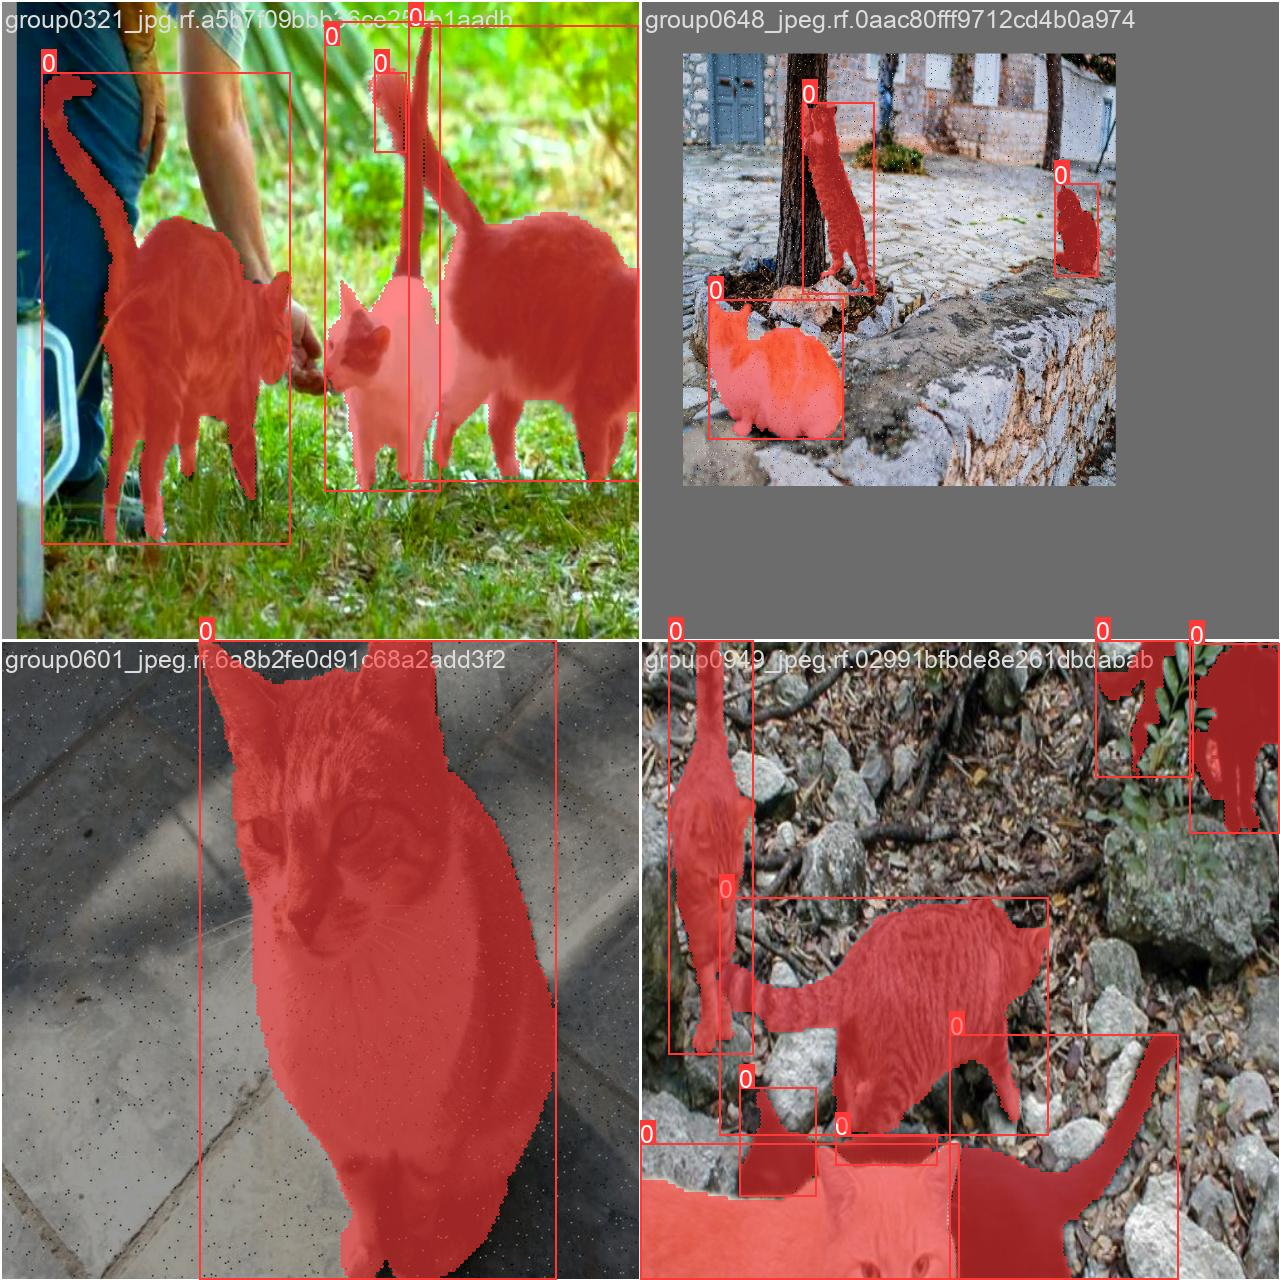

In [ ]:
# Show a result from running the model on a training batch
Image(filename='/content/gdrive/MyDrive/Cat images/models/feral-cat-segmentation.v3i.yolov11/200-epochs/train_batch0.jpg')

In [107]:
# This assumes the trained model has been copied from Colab to Google Drive
trained_model = YOLO('/content/gdrive/MyDrive/Cat images/models/feral-cat-segmentation.v3i.yolov11/yolov11m/200-epochs/weights/best.pt')

In [9]:
!unzip -d /content/data  "/content/test-20250330T171646Z-001.zip"

Archive:  /content/test-20250330T171646Z-001.zip
  inflating: /content/data/test/images/IMG_4172_JPG.rf.a74d8ef992af1eb5f992930852cef419.jpg  
  inflating: /content/data/test/images/group0518_jpg.rf.d692c763bd4a023ce13de173108cea4e.jpg  
  inflating: /content/data/test/images/IMG_4151_JPG.rf.e52d12cfbf566e1d3d95307241a0fdd1.jpg  
  inflating: /content/data/test/images/group0857_jpeg.rf.292202e4f2a2bbbd8e5b5abf3a4f4c2a.jpg  
  inflating: /content/data/test/images/group0939_jpg.rf.3f8c350931357271c36c2d5b34497e2c.jpg  
  inflating: /content/data/test/images/group1080_jpg.rf.3b8a1bc562784816a73a884280f81614.jpg  
  inflating: /content/data/test/images/group0677_jpeg.rf.c5e033e484ea49d9acd6e046f0cd5758.jpg  
  inflating: /content/data/test/images/IMG_4159_JPG.rf.9b8fceb7ed4d2486ddb3e82e6ba57e82.jpg  
  inflating: /content/data/test/images/group1048_jpeg.rf.541b911bf6674f026b5e6113770e28f1.jpg  
  inflating: /content/data/test/images/group0758_jpeg.rf.6fdc8301e673a2ab33b0a22ba9bf71b1.jpg  


The next four cells enable the user to manually check how the trained model performs on images in the validation dataset.  The first cell collects all the validation files, the second cell initializes the manual loop, the third cell gets and displays the next validation image, and the fourth cells runs the model on it at three confidence levels.

In [10]:
import glob
image_paths = []
# get all image paths in validation dataset
for path in glob.glob('/content/data/test/images/*.jpg'):
    image_paths.append(path)
# sort image_path
image_paths.sort()
image_paths

['/content/data/test/images/IMG_0351_JPG.rf.da8d58c5c1f1148543860a3ecf2b264b.jpg',
 '/content/data/test/images/IMG_1908_JPG.rf.d1a6330be66b5e80db59771f63fcf1aa.jpg',
 '/content/data/test/images/IMG_4046_JPG.rf.59e73baae956568a55504e807903b402.jpg',
 '/content/data/test/images/IMG_4135_JPG.rf.e28a6c22f6ae5b9d5a139009b4c09a75.jpg',
 '/content/data/test/images/IMG_4138_JPG.rf.1fb1da7ce2d5625cf12d2f46725f0d9c.jpg',
 '/content/data/test/images/IMG_4151_JPG.rf.e52d12cfbf566e1d3d95307241a0fdd1.jpg',
 '/content/data/test/images/IMG_4155_JPG.rf.80f4e9c57a521a0f9aa61ad9ca065a4e.jpg',
 '/content/data/test/images/IMG_4159_JPG.rf.9b8fceb7ed4d2486ddb3e82e6ba57e82.jpg',
 '/content/data/test/images/IMG_4172_JPG.rf.a74d8ef992af1eb5f992930852cef419.jpg',
 '/content/data/test/images/STCR6159-frame-at-0m8s_jpg.rf.4ba59b90740118ef5c1896f8bff69228.jpg',
 '/content/data/test/images/STC_5937-frame-at-0m9s_jpg.rf.f5f2231c0f271073963d76508d27b27d.jpg',
 '/content/data/test/images/STC_5961_JPG.rf.9292d365bebf374

In [55]:
len(image_paths)

46

In [108]:
i = -1
CONFIDENCE_THRESHOLDS = [0.3, 0.5, 0.7]

Index 0, file ID IMG


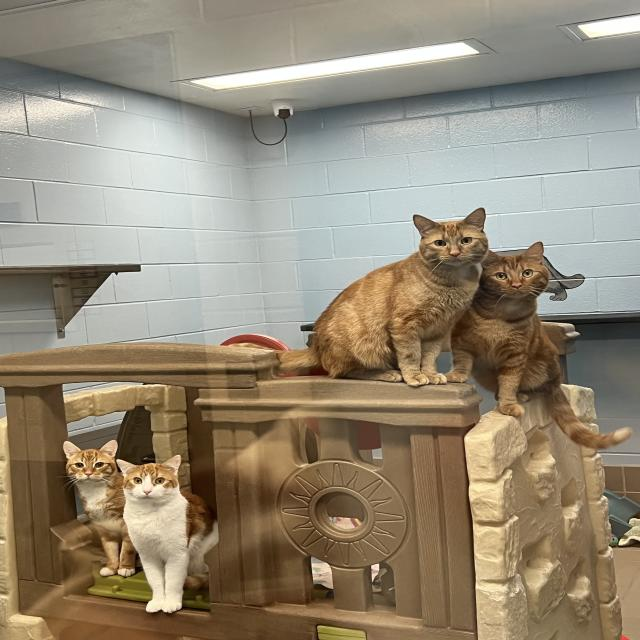

In [109]:
i += 1
new_image = Image.open(image_paths[i])
fileID = image_paths[i].split('/')[-1].split('.')[0].split('_')[0]
print('Index {}, file ID {}'.format(i, fileID))
new_image


0: 640x640 2 cats, 50.3ms
Speed: 2.1ms preprocess, 50.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 cats, 50.4ms
Speed: 2.5ms preprocess, 50.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 cats, 44.9ms
Speed: 1.8ms preprocess, 44.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


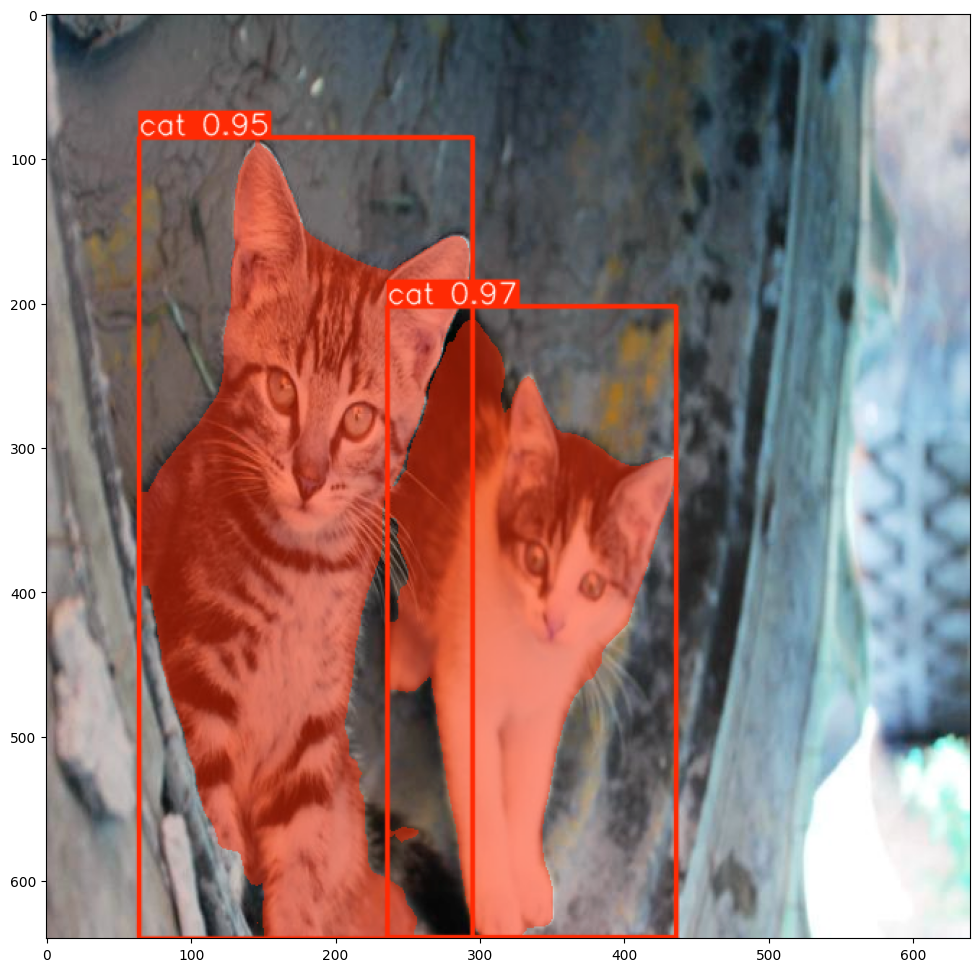

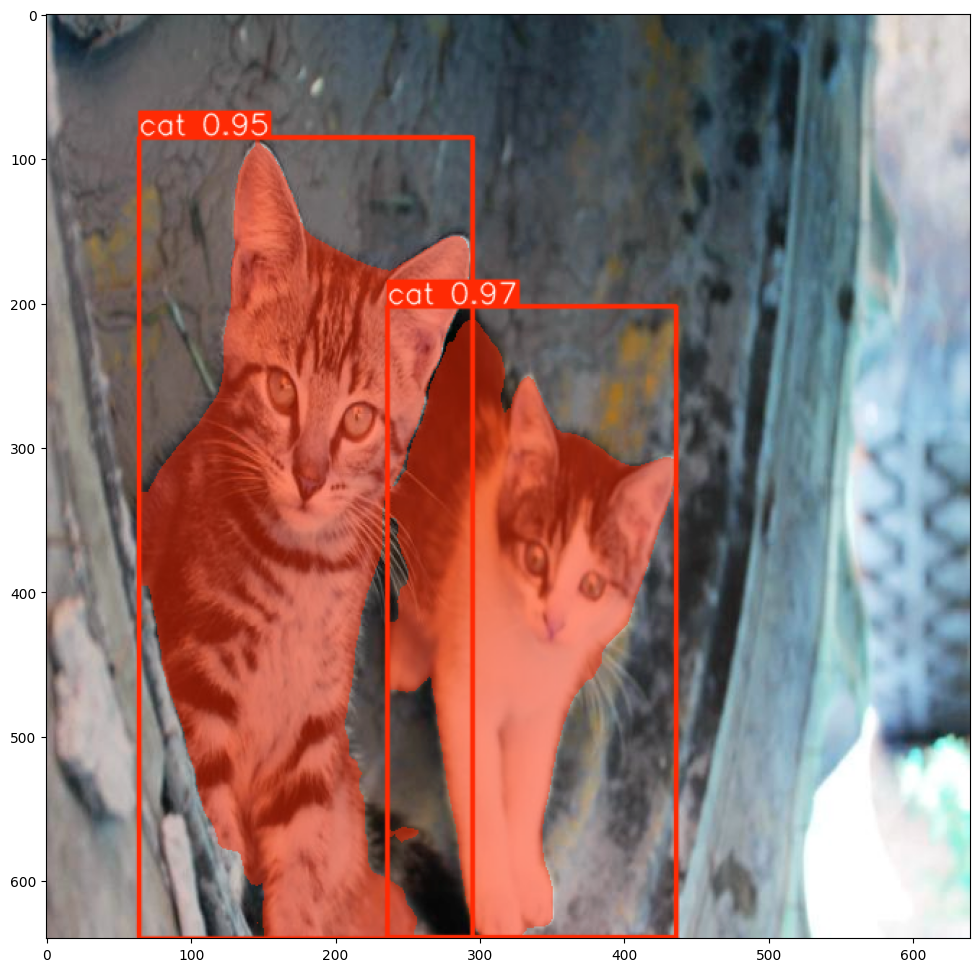

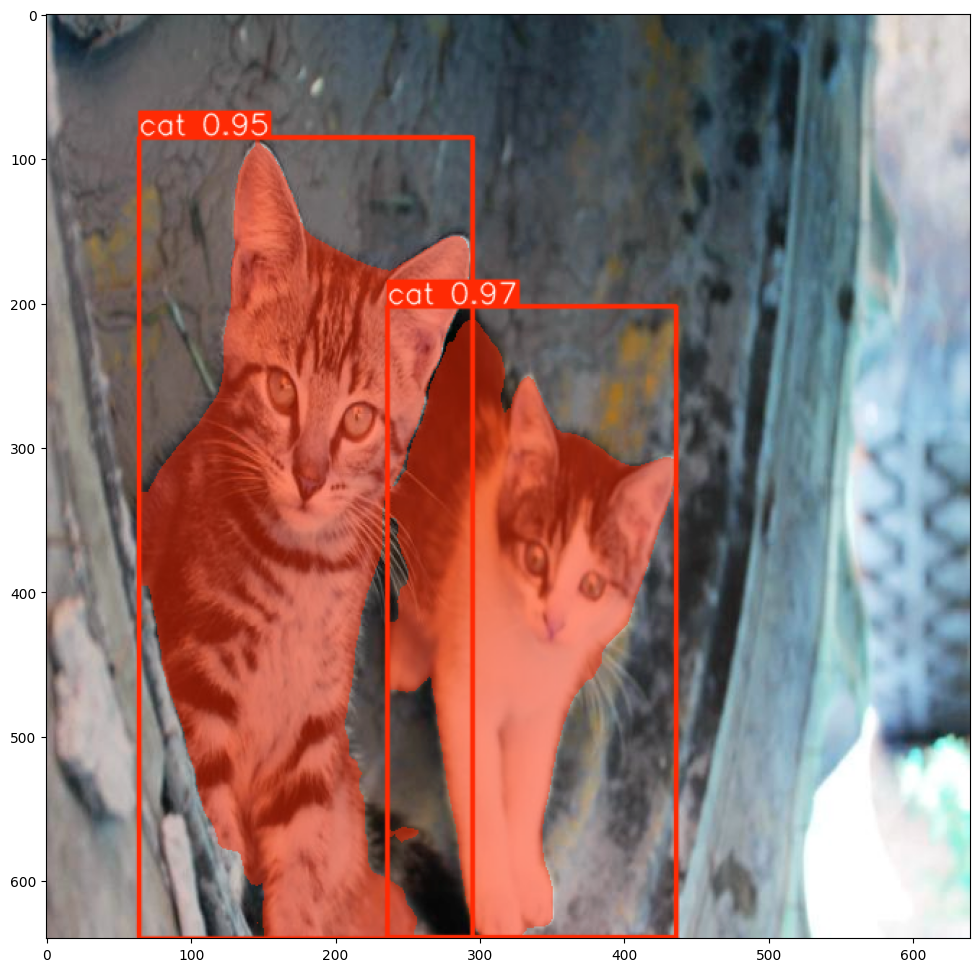

In [155]:
for conf in CONFIDENCE_THRESHOLDS:
  new_results = trained_model.predict(new_image, conf=conf, iou=0.5)
  new_result_array = new_results[0].plot()
  plt.figure(figsize=(12,12))
  plt.imshow(new_result_array);